In [4]:
import matplotlib.pyplot as plt
from scipy.stats import mode
import numpy as np

def let_me_see(X, k, labels, centroids, is_class=False):
    if is_class:
        title = 'Class'
    else:
        title = 'Cluster'
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    markers = ['o', '^', 's', 'v', 'p', '*']

    # two subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # first subplot: plot along 1st and 2nd features
    plt.subplot(1, 2, 1)
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], marker=markers[i], label=f'{title} {i+1}')

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='*', label='Centroids')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.legend()

    # second subplot: plot along 3rd and 4th features
    plt.subplot(1, 2, 2)
    for i in range(k):
        plt.scatter(X[labels == i, 2], X[labels == i, 3], c=colors[i], marker=markers[i], label=f'{title} {i+1}')

    if centroids is not None:
        plt.scatter(centroids[:, 2], centroids[:, 3], c='k', marker='*', label='Centroids')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()

    # show the plot
    plt.show()

def align_labels(y_true, y_pred):
    aligned_y_pred = np.zeros_like(y_pred)
    for i in range(3):
        mask = (y_pred == i)
        aligned_y_pred[mask] = mode(y_true[mask])[0]
    return aligned_y_pred

In [5]:
############ load iris flower dataset ############
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
# 4 features: Petal Length, Petal Width, Sepal Length, Sepal width
y = iris.target
# 0, 1, 2, three Classes(Species)

############ show the dataset ############
print('X.shape:', X.shape)
print('y.shape:', y.shape)
print(f'X[0:5]:\n{X[0:5]}')
print(f'y[0:5]:\n{y[0:5]}')

X.shape: (150, 4)
y.shape: (150,)
X[0:5]:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y[0:5]:
[0 0 0 0 0]


In [6]:
############ Implement K-Means with numpy ############
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.first_iter = True

    def calculate_distance(self, X, centroids):
        # Calculate the distance between each data point and each centroid
        X = X.reshape(X.shape[0],1,X.shape[1])
        centroids=centroids[np.newaxis]
        diff = X-centroids
        distances = np.sqrt(np.sum(diff*diff,axis=2))

        if self.first_iter:
            print(f"distances[0:5]:\n{distances[0:5]}")

        return distances

    def assign_labels(self, distances):
        # Assign each data point to the nearest centroid

        labels =np.argmin(distances,axis=1)


        if self.first_iter:
            print(f"labels[0:5]:\n{labels[0:5]}")


        return labels


    def update_centroids(self, X, centroids, labels):
        # Update the centroids based on the mean of the data points assigned to them
        for k in range(centroids.shape[0]):
          centroids[k]= np.mean(X[labels==k],axis=0)


        if self.first_iter:
            print(f"centroids:\n{centroids}")
        return centroids


    def fit(self, X):
        # Step 1: Initialize K centroids randomly
        centroids = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            # Step 2: Calculate the distance
            distances = self.calculate_distance(X, centroids)
            # Step 3: Assign each data point to the nearest centroid
            labels = self.assign_labels(distances)
            # Step 4: Update the centroids based on the mean of the data points assigned to them
            centroids = self.update_centroids(X, centroids, labels)
            self.first_iter = False
        print(f"final centroids:\n{centroids}")
        print(f'final labels:\n{labels}')
        return labels, centroids

In [7]:
# run K-Means
np.random.seed(23333)
k = 3
my_kmeans = KMeans(n_clusters=k)
labels, centroids = my_kmeans.fit(X)

distances[0:5]:
[[4.63680925 0.80622577 6.21128006]
 [4.70212718 1.34164079 6.26178888]
 [4.86826458 1.28452326 6.44670458]
 [4.76025209 1.42478068 6.32297398]
 [4.68614981 0.78102497 6.26578008]]
labels[0:5]:
[1 1 1 1 1]
centroids:
[[6.17045455 2.86477273 4.80909091 1.66022727]
 [5.00566038 3.36981132 1.56037736 0.29056604]
 [7.57777778 3.1        6.42222222 2.04444444]]
final centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
final labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


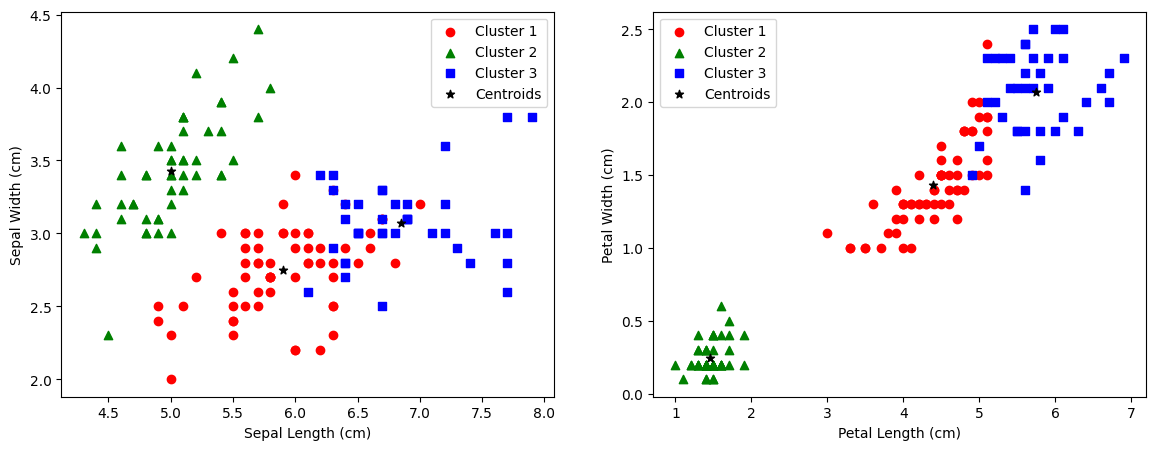

In [8]:
# plot the result
let_me_see(X, k, labels, centroids)

In [9]:
# sum of squared errors (SSE)
def sse(X, labels, centroids):

    sse =  0
    for i in range(centroids.shape[0]):
      points = X[labels==i]
      pt_centroids = centroids[i,:]
      points = points.reshape(points.shape[0],1,points.shape[1])
      diff = points-pt_centroids
      distances = np.sum(diff*diff,axis=0)
      sse+=np.sum(distances)
    return sse

# accuracy (ACC)
def accuracy(y, y_pred):

    acc = None
    acc = np.sum(y==y_pred)/y.shape[0]
    return acc


In [10]:
print(f'SSE: {sse(X, labels, centroids)}')

SSE: 78.851441426146


Accuracy: 0.8933333333333333


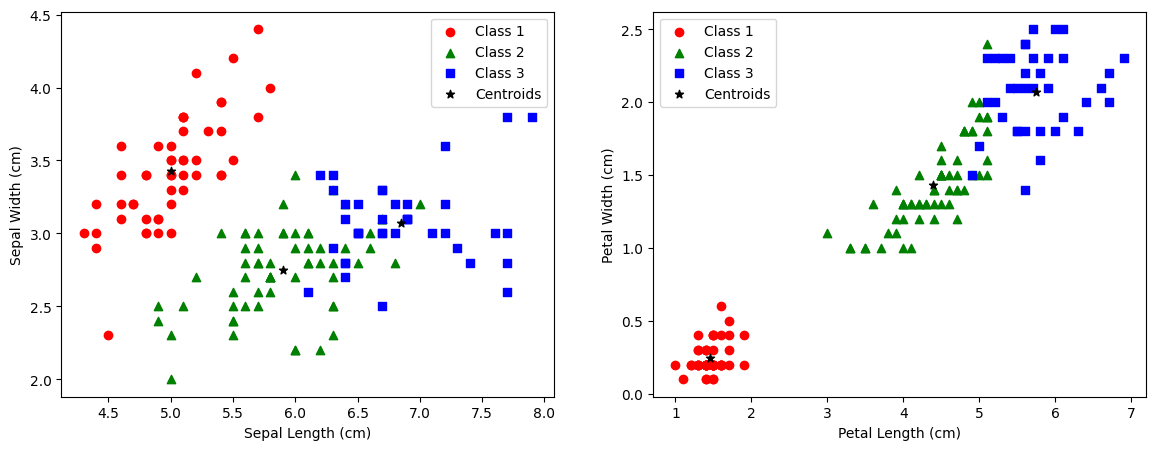

In [11]:
# align the labels with the ground truth
aligned_y_pred = align_labels(y, labels)

# calucate the accuracy
print(f'Accuracy: {accuracy(y, aligned_y_pred)}') # expected ACC should be around 0.8933

# plot the aligned labels
let_me_see(X, k, aligned_y_pred, centroids, True) # expected aligned label output should be the same as the task 1

In [12]:
############## set different k ################
k = 3  # possible k range from 1 to 6

distances[0:5]:
[[1.1045361  0.51961524 0.43588989]
 [1.62788206 0.50990195 0.70710678]
 [1.58745079 0.26457513 0.83066239]
 [1.71464282 0.33166248 0.87749644]
 [1.08627805 0.45825757 0.53851648]]
labels[0:5]:
[2 1 1 1 1]
centroids:
[[5.52       4.12       1.38       0.26      ]
 [4.74615385 3.20384615 1.41153846 0.21538462]
 [6.09663866 2.98067227 4.37058824 1.45378151]]
final centroids:
[[5.19375    3.63125    1.475      0.271875  ]
 [4.73181818 2.92727273 1.77272727 0.35      ]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]
final labels:
[0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


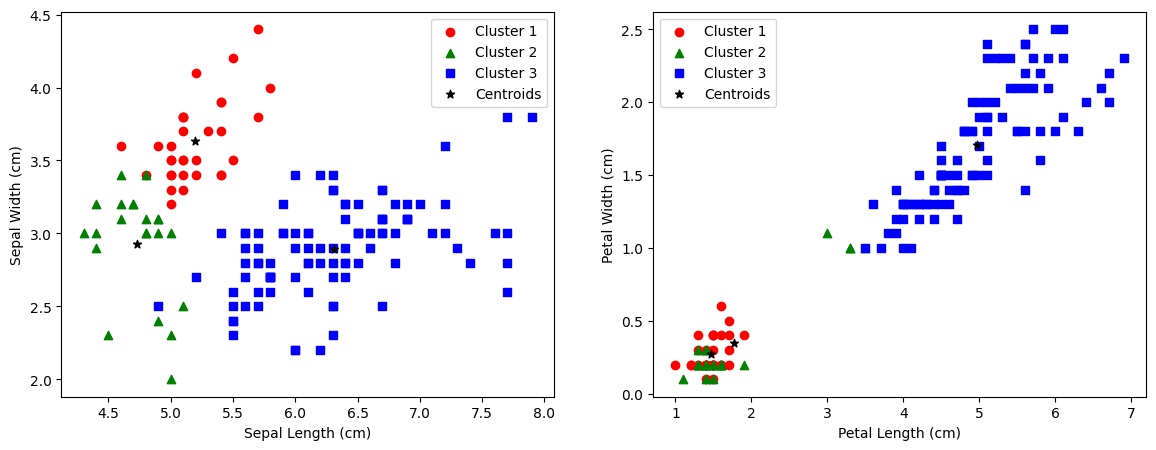

SSE: 142.75406250000006


In [13]:
# run k-means + plot + evalution
labels, centroids = KMeans(n_clusters=k).fit(X)

let_me_see(X, k, labels, centroids)

print(f'SSE: {sse(X, labels, centroids)}') # try to get least SSE as possible by adjusting k
# no evalution for classification result because the ground truth is 3 classes